# Exploratory Data Anlaysis - Analysis
* Develop Metrics for analyzing artists.
* Similarities between artists based on Computational Photographical Analysis
* How different filters look on the images
* Understand Outliers for certain artists


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CV Libraries
import cv2
import skimage

In [2]:
import os
os.chdir('..')
from helpers.SetDataLocation import PathDir
path_dir = PathDir()


path_to_dataset = "C:/Users/Charl/Documents/FinalProject"
# USE FORWARD SLASHES IF WINDOWS ///
path_dir.create_file(path_to_dataset)
path_dir.get_path_and_chdir()
os.chdir(os.getcwd() + '\\' + 'resized' + '\\' + 'resized' )

.artistdata already created. If need to change path, do so manually.


In [3]:
os.listdir()[:5] # Checking 

['Albrecht_DuΓòá├¬rer_1.jpg',
 'Albrecht_DuΓòá├¬rer_10.jpg',
 'Albrecht_DuΓòá├¬rer_100.jpg',
 'Albrecht_DuΓòá├¬rer_101.jpg',
 'Albrecht_DuΓòá├¬rer_102.jpg']

### Develop Metrics for analyzing artists.
* HSV Color Distributions 
* Dynamic Ranges of brightness values
* Edge Detection
* Symmetry and balance
* Geometric analysis

In [4]:
def get_average_hsv(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Calculate the average HSV values
    h_avg, s_avg, v_avg = cv2.mean(hsv)[:3]

    return (h_avg, s_avg, v_avg)

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors


def plot_hsv_distribution(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Get the HSV values for each pixel
    h, s, v = cv2.split(hsv)

    # Reshape the arrays into 1D arrays
    h_1d = h.ravel()
    s_1d = s.ravel()
    v_1d = v.ravel()

    # Convert HSV values to RGB values
    hsv_normalized = np.stack((h_1d/180.0, s_1d/255.0, v_1d/255.0), axis=-1)
    rgb = colors.hsv_to_rgb(hsv_normalized)

    # Create a 3D scatter plot of the HSV values
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(h_1d, s_1d, v_1d, c=rgb, s=1, alpha=0.05)
    ax.set_xlabel('Hue')
    ax.set_ylabel('Saturation')
    ax.set_zlabel('Value')
    plt.show()


In [7]:
img_path = os.getcwd() + "\\" + os.listdir()[8000]
img_path_2 = os.getcwd() + "\\" + os.listdir()[7999]

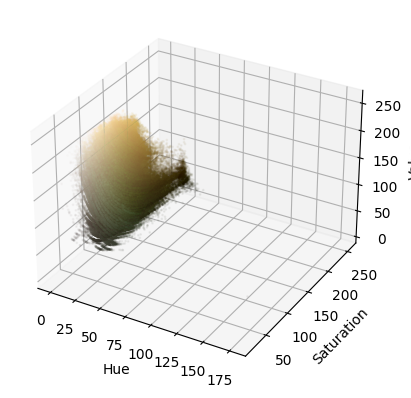

In [8]:

plot_hsv_distribution(img_path)

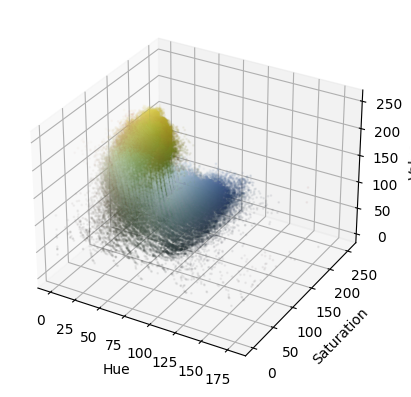

In [9]:
plot_hsv_distribution(img_path_2)

In [10]:
from scipy.stats import multivariate_normal
import numpy as np

def multi_dist(img_path):


    # Load the image and convert it to HSV colorspace
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Reshape the 3D HSV array to a 2D array of shape (n_pixels, 3)
    h_flat = hsv[:,:,0].flatten()
    s_flat = hsv[:,:,1].flatten()
    v_flat = hsv[:,:,2].flatten()
    hsv = np.column_stack((h_flat, s_flat, v_flat))

    mean = np.mean(hsv, axis=0)
    cov = np.cov(hsv.T)

    return mean, cov



### Mahalanobis distance

In [20]:
def mahalanobis(img_path_1, img_path_2):
    """Calculates the Mahalanobis distance and overlap between two multivariate normal distributions.
    
    Args:
        mean1 (ndarray): Mean of the first distribution.
        cov1 (ndarray): Covariance matrix of the first distribution.
        mean2 (ndarray): Mean of the second distribution.
        cov2 (ndarray): Covariance matrix of the second distribution.
    
    Returns:
        float: Percentage of overlap between the two distributions using the probability density function (PDF).
    """
    mean1, cov1 = multi_dist(img_path_1)
    mean2, cov2 = multi_dist(img_path_2)

    # Create two multivariate normal distribution objects
    dist1 = multivariate_normal(mean1, cov1)
    dist2 = multivariate_normal(mean2, cov2)

    # Calculate the Mahalanobis distance between the two means
    mahalanobis_dist = np.sqrt((mean1 - mean2) @ np.linalg.inv((cov1 + cov2) / 2) @ (mean1 - mean2))

    # Calculate the overlap between the two distributions using the PDF
    n_samples = 1000
    samples1 = dist1.rvs(n_samples)
    samples2 = dist2.rvs(n_samples)
    overlap = np.mean(dist1.cdf(samples2) + dist2.cdf(samples1))

    return overlap * 100

In [21]:
mahalanobis(img_path, img_path_2)

36.87562270533217

##### Dynamic Range of Images
https://en.wikipedia.org/wiki/Dynamic_range

In [30]:
import numpy as np
from scipy.stats import lognorm, expon, weibull_min, gamma, beta

# Log-Normal Distribution
def fit_lognormal(data):
    params = lognorm.fit(data)
    return params

# Exponential Distribution
def fit_exponential(data):
    params = expon.fit(data)
    return params

# Weibull Distribution
def fit_weibull(data):
    params = weibull_min.fit(data)
    return params

# Gamma Distribution
def fit_gamma(data):
    params = gamma.fit(data)
    return params

# Beta Distribution
def fit_beta(data):
    params = beta.fit(data)
    return params

# Skewness Calculation
def calculate_skewness(data):
    skewness = np.mean((data - np.mean(data)) ** 3) / np.power(np.var(data), 1.5)
    return skewness

In [33]:

def analyze_dynamic_range(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the minimum and maximum pixel intensities
    min_intensity = np.min(image)
    max_intensity = np.max(image)

    # Calculate the dynamic range
    dynamic_range = max_intensity - min_intensity

    # Calculate the histogram of pixel intensities
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Calculate cumulative distribution function (CDF)
    cdf = histogram.cumsum()

    # Normalize the CDF
    cdf_normalized = cdf * histogram.max() / cdf.max()

    # Visualize the histogram and CDF
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(image.flatten(), bins=256, range=[0, 256], color='b')
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.plot(cdf_normalized, color='r')
    plt.title('CDF (Cumulative Distribution Function)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('CDF')

    plt.tight_layout()
    plt.show()

    data = np.array(image.flatten())
    # Fit distributions
    lognormal_params = fit_lognormal(data)
    exponential_params = fit_exponential(data)
    weibull_params = fit_weibull(data)
    gamma_params = fit_gamma(data)
    beta_params = fit_beta(data)

    # Calculate skewness
    skewness = calculate_skewness(data)

    print("Log-Normal Distribution Parameters:", lognormal_params)
    print("Exponential Distribution Parameters:", exponential_params)
    print("Weibull Distribution Parameters:", weibull_params)
    print("Gamma Distribution Parameters:", gamma_params)
    print("Beta Distribution Parameters:", beta_params)
    print("Skewness:", skewness)

    # Print the dynamic range
    print("Minimum Intensity:", min_intensity)
    print("Maximum Intensity:", max_intensity)
    print("Dynamic Range:", dynamic_range)
    print("Average Range:", np.mean(image.flatten()))
    print("Standard Deviation:", np.std(image.flatten()))




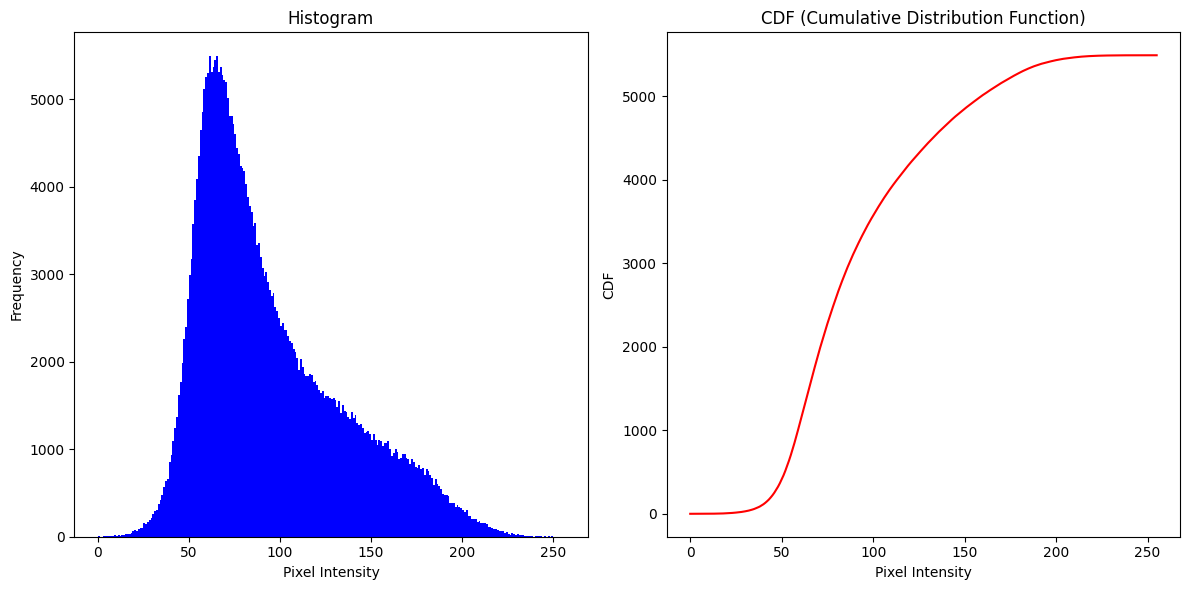

c:\Users\Charl\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Log-Normal Distribution Parameters: (0.4008585541136165, -2.401502277114356, 89.03212954017943)
Exponential Distribution Parameters: (0.0, 94.10416748146451)
Weibull Distribution Parameters: (2.516389167401077, -0.013587225178015989, 106.37689920333828)
Gamma Distribution Parameters: (6.048425169000474, -0.12235405271571259, 15.578676184319445)
Beta Distribution Parameters: (6.076193993573053, 414.7816316373177, -0.01977356377018369, 6541.474961608032)
Skewness: 0.8995705921916846
Minimum Intensity: 0
Maximum Intensity: 254
Dynamic Range: 254
Average Range: 94.10416748146451
Standard Deviation: 39.83583511265128


In [34]:
# Usage example
analyze_dynamic_range(img_path)

##### Edge Detection
* Canny Edge detectin with different hysterisis thresholds
* Sobel Kernel
* Roberts Diagonal Kernel
* Laplacian of Gaussian kernel

In [ ]:
def canny_edge_detection(image, threshold1, threshold2):
    edges = cv2.Canny(image, threshold1, threshold2)
    return edges

def sobel_operator(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    magnitude = np.uint8(magnitude)
    return magnitude

def laplacian_of_gaussian(image, kernel_size):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    return laplacian

def roberts_operator(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]], dtype=np.float32)
    kernel2 = np.array([[0, 0, 0], [0, 0, 1], [0, -1, 0]], dtype=np.float32)
    roberts1 = cv2.filter2D(gray, -1, kernel1)
    roberts2 = cv2.filter2D(gray, -1, kernel2)
    magnitude = np.sqrt(roberts1**2 + roberts2**2)
    magnitude = np.uint8(magnitude)
    return magnitude
